In [1]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyspark as spark
from pyspark.sql.functions import col, translate

In [2]:
# On charge le dataset
file_path = 'C:/Users/Thierno Barry/Documents/Machine Learning/00.data/input/listings.csv'
sf_listings = pd.read_csv(file_path)

In [3]:
# aperçu du dataset
display(sf_listings)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.770280,-122.433170,Entire home/apt,194,2,371,2022-11-18,2.28,1,161,57,City Registration Pending
1,487499,Mission District - Perfect Location,1682183,Daniel,NaN,Mission,37.758840,-122.422320,Entire home/apt,125,30,192,2022-10-31,1.51,1,356,5,NaN
2,144978,Prime Location - Small Basic Room,216682,Jay,NaN,Pacific Heights,37.792330,-122.424310,Private room,55,30,120,2020-03-31,0.86,9,54,0,NaN
3,490931,"Mission's ""La Lengua""",1269188,Maureen,NaN,Bernal Heights,37.747660,-122.420410,Private room,100,30,79,2015-08-01,0.75,1,358,0,NaN
4,147443,Best Views in all of San Francisco,709325,Mark,NaN,Diamond Heights,37.746330,-122.445910,Entire home/apt,167,30,112,2022-09-30,0.80,5,187,2,STR-0000672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,766862652834987085,Perfect for work travel!,137725971,Roselyn & Ming,NaN,Bayview,37.736322,-122.398075,Private room,34,30,0,NaN,NaN,2,276,0,NaN
6785,766962036540009367,Original SF Boutique Hotel Room,486687635,Allen,NaN,Western Addition,37.788161,-122.422770,Private room,89,2,1,2022-12-01,1.00,16,364,1,Exempt
6786,766969861563240321,Authentic SF Boutique Hotel Room,486687635,Allen,NaN,Nob Hill,37.789259,-122.420668,Private room,88,2,0,NaN,NaN,16,352,0,Exempt
6787,766974003390473190,Classic SF Boutique Hotel Room,486687635,Allen,NaN,Western Addition,37.788880,-122.422430,Private room,89,2,0,NaN,NaN,16,350,0,Exempt


In [4]:
# lister les colonnes
sf_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
columns_to_keep = ['id', 
                   'name', 
                   'host_id', 
                   'host_name', 
                   'neighbourhood_group',
                   'neighbourhood', 
                   'latitude', 
                   'longitude', 
                   'room_type', 
                   'price',
                   'minimum_nights', 
                   'number_of_reviews', 
                   'last_review',
                   'reviews_per_month', 
                   'calculated_host_listings_count',
                   'availability_365', 
                   'number_of_reviews_ltm', 
                   'license']
base_df = sf_listings[columns_to_keep]
base_df.count()

id                                6789
name                              6789
host_id                           6789
host_name                         6789
neighbourhood_group                  0
neighbourhood                     6789
latitude                          6789
longitude                         6789
room_type                         6789
price                             6789
minimum_nights                    6789
number_of_reviews                 6789
last_review                       5562
reviews_per_month                 5562
calculated_host_listings_count    6789
availability_365                  6789
number_of_reviews_ltm             6789
license                           4092
dtype: int64

In [6]:
display(base_df['price'])

0       194
1       125
2        55
3       100
4       167
       ... 
6784     34
6785     89
6786     88
6787     89
6788    212
Name: price, Length: 6789, dtype: int64

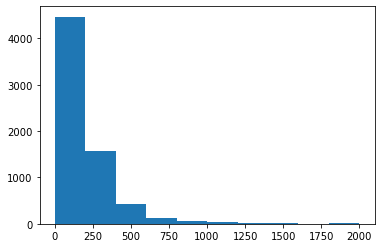

In [7]:
fig, ax = plt.subplots()
ax.hist(base_df['price'], range=(0,2000))
plt.show()

Text(0.5, 1.0, "Exemple d' histogramme simple")

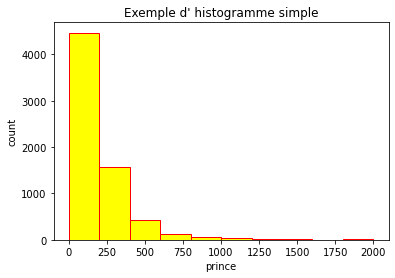

In [8]:
x = base_df['price']
plt.hist(x, range = (0, 2000), bins = 10, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('prince')
plt.ylabel('count')
plt.title('Exemple d\' histogramme simple')

In [9]:
fixed_price_df = base_df['price']
display(fixed_price_df.describe())

count     6789.000000
mean       268.709088
std        944.974389
min          0.000000
25%         99.000000
50%        150.000000
75%        250.000000
max      25000.000000
Name: price, dtype: float64

In [10]:
display(base_df.describe())

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.789000e+03,6.789000e+03,0.0,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,5562.000000,6789.000000,6789.000000,6789.000000
mean,1.208976e+17,1.023542e+08,NaN,37.768296,-122.430186,268.709088,23.556930,48.659449,1.364036,13.667256,173.049345,10.637207
std,2.589342e+17,1.332468e+08,NaN,0.023061,0.027537,944.974389,53.748277,94.476154,1.991691,31.192535,133.141768,22.925957
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.693015e+07,5.805679e+06,NaN,37.752970,-122.442880,99.000000,2.000000,1.000000,0.200000,1.000000,46.000000,0.000000
50%,3.564333e+07,3.601338e+07,NaN,37.772640,-122.423030,150.000000,6.000000,8.000000,0.580000,2.000000,164.000000,2.000000
75%,5.123414e+07,1.565042e+08,NaN,37.787430,-122.410390,250.000000,30.000000,49.000000,1.870000,9.000000,310.000000,10.000000
max,7.734981e+17,4.896232e+08,NaN,37.809540,-122.358480,25000.000000,1125.000000,977.000000,36.490000,153.000000,365.000000,558.000000


In [11]:
display(base_df.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False))

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.789000e+03,6.789000e+03,0.0,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,5562.000000,6789.000000,6789.000000,6789.000000
mean,1.208976e+17,1.023542e+08,NaN,37.768296,-122.430186,268.709088,23.556930,48.659449,1.364036,13.667256,173.049345,10.637207
std,2.589342e+17,1.332468e+08,NaN,0.023061,0.027537,944.974389,53.748277,94.476154,1.991691,31.192535,133.141768,22.925957
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.693015e+07,5.805679e+06,NaN,37.752970,-122.442880,99.000000,2.000000,1.000000,0.200000,1.000000,46.000000,0.000000
50%,3.564333e+07,3.601338e+07,NaN,37.772640,-122.423030,150.000000,6.000000,8.000000,0.580000,2.000000,164.000000,2.000000
75%,5.123414e+07,1.565042e+08,NaN,37.787430,-122.410390,250.000000,30.000000,49.000000,1.870000,9.000000,310.000000,10.000000
max,7.734981e+17,4.896232e+08,NaN,37.809540,-122.358480,25000.000000,1125.000000,977.000000,36.490000,153.000000,365.000000,558.000000


In [12]:
display(base_df.count())

id                                6789
name                              6789
host_id                           6789
host_name                         6789
neighbourhood_group                  0
neighbourhood                     6789
latitude                          6789
longitude                         6789
room_type                         6789
price                             6789
minimum_nights                    6789
number_of_reviews                 6789
last_review                       5562
reviews_per_month                 5562
calculated_host_listings_count    6789
availability_365                  6789
number_of_reviews_ltm             6789
license                           4092
dtype: int64

In [13]:
display(base_df['price'].mean())

268.70908823096187

In [14]:
price = base_df['price']
price_is_null = pd.isnull(price)
price_null = price[price_is_null]
price_null_count = len(price_null)
print(price_null_count)

0


In [15]:
base_df['price'].value_counts()

150    128
125    119
100    117
250    101
95      94
      ... 
31       1
541      1
388      1
271      1
656      1
Name: price, Length: 627, dtype: int64

In [16]:
for item in base_df.columns:
    print(item, "count = ", base_df[item].count())

id count =  6789
name count =  6789
host_id count =  6789
host_name count =  6789
neighbourhood_group count =  0
neighbourhood count =  6789
latitude count =  6789
longitude count =  6789
room_type count =  6789
price count =  6789
minimum_nights count =  6789
number_of_reviews count =  6789
last_review count =  5562
reviews_per_month count =  5562
calculated_host_listings_count count =  6789
availability_365 count =  6789
number_of_reviews_ltm count =  6789
license count =  4092


In [17]:
ar = np.array([[base_df['price'].count(), base_df['minimum_nights'].count(), base_df['number_of_reviews'].count()], 
               [base_df['price'].min(), base_df['minimum_nights'].min(), base_df['number_of_reviews'].min()], 
               [base_df['price'].max(), base_df['minimum_nights'].max(), base_df['number_of_reviews'].max()]])
df = pd.DataFrame(ar, index = ['count', 'min', 'max'], columns = ['price', 'minimum_nights', 'number_of_reviews'])

display(df)

,price,minimum_nights,number_of_reviews
count,6789,6789,6789
min,0,1,0
max,25000,1125,977


In [18]:
base_df['price'].std()

944.9743892892933

In [19]:
lst_count = []
lst_count.append(base_df['price'].count())
lst_count.append(base_df['minimum_nights'].count())
print(lst_count)

[6789, 6789]


In [20]:
lst_count = []
lst_min = []
lst_mean = []
lst_max = []
for item in base_df.columns:
    lst_count.append(base_df[item].count())
    #lst_min.append(base_df[item].min())
    #lst_mean.append(base_df[item].mean())
    #lst_max.append(base_df[item].max())
    
#ar = np.array([lst_count, lst_min, lst_mean, lst_max])
print(lst_count)

[6789, 6789, 6789, 6789, 0, 6789, 6789, 6789, 6789, 6789, 6789, 6789, 5562, 5562, 6789, 6789, 6789, 4092]


In [21]:
fixed_price_df = pd.DataFrame(base_df['price'])
display(fixed_price_df)

,price
0,194
1,125
2,55
3,100
4,167
...,...
6784,34
6785,89
6786,88
6787,89


In [22]:
fixed_price_df[fixed_price_df['price'] == 0].count()
#pos_prices_df = base_df[base_df['price'] == 0]

price    3
dtype: int64

In [23]:
pos_prices_df = fixed_price_df[fixed_price_df['price'] > 0]
pos_prices_df.count()

price    6786
dtype: int64

In [24]:
#Now only keep rows with a strictly positive price.
pos_prices_df = base_df[base_df['price'] > 0]

In [25]:
#Let's take a look at the min and max values of the minimum_nights column:
display(pos_prices_df['minimum_nights'].describe())

count    6786.000000
mean       23.566902
std        53.758065
min         1.000000
25%         2.000000
50%         6.000000
75%        30.000000
max      1125.000000
Name: minimum_nights, dtype: float64

In [26]:
display(pos_prices_df.groupby(by=["minimum_nights"]).count())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
minimum_nights,,,,,,,,,,,,,,,,,
1,1306,1306,1306,1306,0,1306,1306,1306,1306,1306,1306,1132,1132,1306,1306,1306,1300
2,1186,1186,1186,1186,0,1186,1186,1186,1186,1186,1186,1091,1091,1186,1186,1186,1184
3,530,530,530,530,0,530,530,530,530,530,530,504,504,530,530,530,530
4,208,208,208,208,0,208,208,208,208,208,208,195,195,208,208,208,208
5,156,156,156,156,0,156,156,156,156,156,156,141,141,156,156,156,155
6,24,24,24,24,0,24,24,24,24,24,24,24,24,24,24,24,24
7,73,73,73,73,0,73,73,73,73,73,73,66,66,73,73,73,72
8,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
9,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2


In [27]:
count_minimum_nights = pd.DataFrame(pos_prices_df.groupby(by=["minimum_nights"]).count())
count_minimum_nights = count_minimum_nights['id']
display(count_minimum_nights)

minimum_nights
1       1306
2       1186
3        530
4        208
5        156
6         24
7         73
8          1
9          2
10        12
12         1
13         2
14        10
15         9
20         3
21         3
28        10
29         5
30      2701
31       240
32        32
35         2
40         1
42         1
45        11
50         1
55         1
60        36
62         1
70         1
75         2
80         1
85         1
90        38
93         1
113        1
120       19
150        3
179        1
180       14
183        2
190        1
192        1
200        1
240        2
270        1
280        7
300        2
360        3
364        5
365      104
366        2
500        3
1000       1
1125       1
Name: id, dtype: int64

In [28]:
display(pos_prices_df["minimum_nights"].count())

6786

In [29]:
pos_prices_df['minimum_nights'].unique()

array([   2,   30,   32,    4,    3,    9,   31,    1,    5,   60,    7,
         90,    6,   28,  183,   15,  360,  200,   50,   45,  365,  364,
         35,   14,   13,  113,   29,   10,  500,  366,  180,   70,  240,
       1125, 1000,    8,   20,   62,  280,  120,   12,  179,   80,  190,
        300,  150,   75,  192,   21,   55,   93,   85,   42,   40,  270],
      dtype=int64)

In [30]:
pos_prices_df['id'].count()

6786

In [43]:
counts_dictionary = dict()
counts_list = []
for n in pos_prices_df['minimum_nights'].unique():
    nights_df = pos_prices_df[pos_prices_df['minimum_nights'] == n]
    total = nights_df["id"].count()
    counts_dictionary[n] = total
    counts_list.append([n, total])
    
ar = np.array(counts_list)
df = pd.DataFrame(ar, columns = ['minimum_nights', 'count'])

In [44]:
print(counts_dictionary)

{2: 1186, 30: 2701, 32: 32, 4: 208, 3: 530, 9: 2, 31: 240, 1: 1306, 5: 156, 60: 36, 7: 73, 90: 38, 6: 24, 28: 10, 183: 2, 15: 9, 360: 3, 200: 1, 50: 1, 45: 11, 365: 104, 364: 5, 35: 2, 14: 10, 13: 2, 113: 1, 29: 5, 10: 12, 500: 3, 366: 2, 180: 14, 70: 1, 240: 2, 1125: 1, 1000: 1, 8: 1, 20: 3, 62: 1, 280: 7, 120: 19, 12: 1, 179: 1, 80: 1, 190: 1, 300: 2, 150: 3, 75: 2, 192: 1, 21: 3, 55: 1, 93: 1, 85: 1, 42: 1, 40: 1, 270: 1}


In [47]:
display(df.sort_values(by = 'count', ascending = False))

,minimum_nights,count
1,30,2701
7,1,1306
0,2,1186
4,3,530
6,31,240
3,4,208
8,5,156
20,365,104
10,7,73
11,90,38


In [48]:
count_list = []

for key, value in counts_dictionary.items():
    count_list.append([key, value])

ar = np.array(count_list)
df = pd.DataFrame(ar, columns = ['minimum_nights', 'count'])

display(df)

,minimum_nights,count
0,2,1186
1,30,2701
2,32,32
3,4,208
4,3,530
5,9,2
6,31,240
7,1,1306
8,5,156
9,60,36


In [71]:
# A minimum stay of one year seems to be a reasonable limit here. 
# Let's filter out those records where the minimum_nights is greater then 365.
min_nights_df = pos_prices_df[pos_prices_df['minimum_nights'] <= 365]
min_nights_df.count()

id                                6779
name                              6779
host_id                           6779
host_name                         6779
neighbourhood_group                  0
neighbourhood                     6779
latitude                          6779
longitude                         6779
room_type                         6779
price                             6779
minimum_nights                    6779
number_of_reviews                 6779
last_review                       5554
reviews_per_month                 5554
calculated_host_listings_count    6779
availability_365                  6779
number_of_reviews_ltm             6779
license                           4088
dtype: int64

In [72]:
new_min_nights_df = min_nights_df
del new_min_nights_df['neighbourhood_group']
# Drop any records that contain nulls
new_min_nights_df = new_min_nights_df.dropna()

new_min_nights_df.count()

id                                3737
name                              3737
host_id                           3737
host_name                         3737
neighbourhood                     3737
latitude                          3737
longitude                         3737
room_type                         3737
price                             3737
minimum_nights                    3737
number_of_reviews                 3737
last_review                       3737
reviews_per_month                 3737
calculated_host_listings_count    3737
availability_365                  3737
number_of_reviews_ltm             3737
license                           3737
dtype: int64

In [66]:
col_lst = new_min_nights_df.columns
for i in range(0,len(col_lst)):
    #print("index = ", i, ", value = ", col_lst[i])
    if col_lst[i] == "neighbourhood_group":
        print("index = ", i, ", value = ", col_lst[i])

index =  4 , value =  neighbourhood_group


In [76]:

type(new_min_nights_df['id'])

pandas.core.series.Series

In [77]:
# lister le type des variables
new_min_nights_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [84]:
# récupérer la liste des variables intéger
integer_columns = []
columns_df = new_min_nights_df.columns
for col in columns_df:
    if new_min_nights_df[col].dtypes == "int64":
        integer_columns.append(col)

display(integer_columns)

['id',
 'host_id',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm']

In [79]:
#Add a dummy column to denote presence of null values before imputing.
from pyspark.sql.functions import when

impute_cols = [
    "bedrooms",
    "bathrooms",
    "beds", 
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

for c in impute_cols:
    doubles_df = doubles_df.withColumn(c + "_na", when(col(c).isNull(), 1.0).otherwise(0.0))

dtype('int64')

In [80]:
integer_columns = [new_min_nights_df['id'].dtypes]
integer_columns

[dtype('int64')]

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='host_id', ylabel='id'>,
        <AxesSubplot:xlabel='latitude', ylabel='id'>,
        <AxesSubplot:xlabel='longitude', ylabel='id'>,
        <AxesSubplot:xlabel='price', ylabel='id'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='id'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='id'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='id'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='id'>,
        <AxesSubplot:xlabel='availability_365', ylabel='id'>,
        <AxesSubplot:xlabel='number_of_reviews_ltm', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='host_id'>,
        <AxesSubplot:xlabel='host_id', ylabel='host_id'>,
        <AxesSubplot:xlabel='latitude', ylabel='host_id'>,
        <AxesSubplot:xlabel='longitude', ylabel='host_id'>,
        <AxesSubplot:xlabel='price', ylabel='host_id'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='host_id

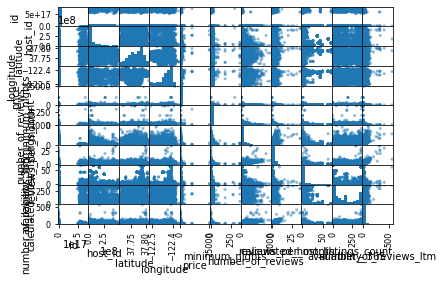

In [87]:
from pandas.plotting import scatter_matrix

scatter_matrix(new_min_nights_df)

In [88]:
new_min_nights_df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.295240,-0.048455,-0.036485,-0.002475,-0.082182,-0.246663,0.145610,-0.089324,0.016163,-0.088973
host_id,0.295240,1.000000,0.069802,-0.023937,0.032746,-0.080220,-0.184647,0.190797,0.015177,0.121723,0.109953
latitude,-0.048455,0.069802,1.000000,0.176500,0.097517,-0.025487,-0.104832,-0.108768,0.359067,0.008268,-0.071207
longitude,-0.036485,-0.023937,0.176500,1.000000,0.047593,0.005684,-0.150578,-0.175047,0.259168,0.009393,-0.151719
price,-0.002475,0.032746,0.097517,0.047593,1.000000,0.039656,-0.081256,-0.075628,-0.053540,-0.011743,-0.069515
minimum_nights,-0.082182,-0.080220,-0.025487,0.005684,0.039656,1.000000,-0.075305,-0.133502,-0.106776,0.076874,-0.149481
number_of_reviews,-0.246663,-0.184647,-0.104832,-0.150578,-0.081256,-0.075305,1.000000,0.561780,-0.171335,0.078657,0.602400
reviews_per_month,0.145610,0.190797,-0.108768,-0.175047,-0.075628,-0.133502,0.561780,1.000000,-0.202492,0.098759,0.833873
calculated_host_listings_count,-0.089324,0.015177,0.359067,0.259168,-0.053540,-0.106776,-0.171335,-0.202492,1.000000,-0.082284,-0.155404
availability_365,0.016163,0.121723,0.008268,0.009393,-0.011743,0.076874,0.078657,0.098759,-0.082284,1.000000,0.110224
